# COGS 108 Final Project - Impact of Twitter and Ad Spending on 2020 Election

# Overview
Since Twitter seemingly contributed to a huge amount of controversy in the last election, we wanted to monitor whether Twitter usage by a candidate correlates to their poll numbers. Additionally, with Mike Bloomberg being one of the richest people to ever run for office and his exorbitant ad spending we also wanted to see if advertisement spending has an effect on polls.
Looking over data from Fivethirtyeight and Twitter from October 2019 to March 2020, we focused on 6 candidates and graphed their ad spending versus their poll numbers over the defined time period and their Twitter activity versus their poll numbers over the defined time period. We use graphical visualization, OLS models, and Pearson correlation matrices to analyze our datasets. After our data analysis, we conclude that direct correlation does not exist. Although we cannot make this definitive statement, our analytical process does show that some candidates demonstrate a strong correlation that is worth seeing and discussing.

# Names
Daniel Nguyen <br>
Heejung Emily Son  <br>
Olivia Thai  <br>
Anthony Villanueva  <br>

# Research Question
In the 2020 elections, is there a correlation between advertisement spending and a candidate's poll numbers? Is there a correlation between how active a candidate is on Twitter and a candidate's poll number? Specifically, does the number of times a candidate tweets on Twitter have a direct relationship with the candidate's poll numbers?

# Background and Prior Work
   There are various factors that affect the poll popularity of candidates during presidential elections. In this project, we would like to explore how advertisement spending and number of Twitter tweets affect a candidate’s poll popularity for the 2020 US Presidential Elections. According to Group M, a prominent ad agency, political advertisement spending may reach $10 billion, a 59 percent increase from the previous 2016 election (1). Likewise, Twitter has become a news hub during past presidential elections, especially as candidates attempt to engage with voters. We would like to see how Twitter engagement and the number of tweets by a presidential candidate may affect their polls.
	We were unable to find previous works that analyzed the effect Twitter engagement by a presidential candidate in the past had on that candidate’s polls. A study by David Anuta, Josh Churchin, and Jiebo Luo used sentiment analysis on Twitter tweets from the 2016 presidential election about a candidate and compared it to their polls and election results, concluding that relying on Twitter does not accurately predict results (2). However, our project will focus on the number of tweets made by a candidate. As for ad spending, a 2010 study by Bowdoin’s Michael Franz and Washington State University’s Travis Ridout concluded that advertising had an impact on voting for the 2008 election, whereas our project would like to analyze its impact on polls rather than election results (3).
    
Links <br>
(1) https://www.forbes.com/sites/bradadgate/2019/09/03/the-2020-elections-will-set-another-ad-spending-record/#95320118360d <br>
(2)https://www.rochester.edu/newscenter/what-twitter-and-data-science-tell-us-about-the-2016-election-218762/ <br>
(3) https://www.npr.org/sections/itsallpolitics/2015/08/19/432759311/2016-campaign-tv-ad-spending <br>

# Hypothesis
We expect both ad spending and Twitter activity by a candidate to have a positive correlation on a candidate’s poll numbers. We also expect the correlation constant for ad spending vs poll numbers will be higher than the correlation constant between Twitter activity and poll numbers.
Due to the rise of social media such as Twitter, we believe that the influence of social media should impact a candidate’s popularity and contribute to higher poll numbers. Since ad spending can affect social media and traditional media, we believe that there will be a positive correlation between ad spending and poll numbers. Because ad spending encompasses a broader scope than Twitter, we believe that the correlation constant for ad spending will be higher than that of Twitter activity.


# Dataset(s)
* **DATASET 1: POLLING DATASET** <br>
    We got the dataset of poll results from FiveThirtyEight, which is a website focused on political and poll analysis. We found a dataset that provides the latest polling data. It includes data from many different pollsters with frequent updates. Because it includes so much data with frequent updates, it was perfect for us to analyze trends throughout time. It included the candidate the poll result applied to, the timeframe in which the data was collected, and the percentage, representing the percentage of people supporting this candidate during this time. The dataset includes poll results from a while back and candidates who are no longer relevant in the election, but we decided to select the timeframe and candidates we wanted to analyze later in the data cleaning process. <br>
    Link: https://github.com/fivethirtyeight/data/tree/master/polls <br>

* **DATASET 2: TV AD SPENDING DATASET** <br>
    We found a dataset from Google’s transparency report that contains information on how much an advertiser spent on TV advertisement during a week. The dataset contains the amount of US dollars spent by a particular advertiser representing a certain candidate’s campaign. We standardized the advertiser by extracting the candidate’s name each advertiser was supporting. This dataset suited our project because it told us how each candidate’s ad spending changed through a course of time. <br>
    Link: https://transparencyreport.google.com/political-ads/region/US <br>

* **DATASET 3: TWITTER DATASET** <br>
    This website allowed us to scrape 3,200 most recent tweets from any given user. We were able to get the tweets for each of the candidates we want to examine. We narrowed down to 6 candidates we wanted to include in our analysis based on prior knowledge on who were leading and most significant candidates, despite some having dropped out since our selection. For each candidate, we received data on 3,200 of their most recent tweets, including the content of the tweet, the date it was created, the number of favorites, and the number of retweets. <br>
    Link: https://www.vicinitas.io/free-tools/download-search-tweets?tracker=BernieSanders 


# Setup
We used the following packages for this project

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm
from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

# Data Cleaning
We're setting a range of dates that we plan to analyze. We decided to use 21 weeks of data starting on October 6th, 2019 and ending on March 1st, 2020.

In [131]:
end_date_str = '2020-03-01'
days_back = 7 * 21
date_format = '%Y-%m-%d'
end_date = datetime.strptime(end_date_str, date_format)
start_date = end_date - timedelta(days=days_back)
date_range = (start_date.strftime(date_format), end_date_str)
print('Start Date: %s' % date_range[0])
print('End Date: %s' % date_range[1])

Start Date: 2019-10-06
End Date: 2020-03-01


Getting the dates of each end of the week within our time frame.

In [132]:
# Getting all the week end dates
date_ranges = []
date_format = '%Y-%m-%d'
d = date_range[0]
end_date = date_range[1]
while d < end_date:
    date = datetime.strptime(d, date_format)
    date = date + timedelta(days=7)
    d2 = date.strftime(date_format)
    date_ranges.append((d, d2))
    d = d2

week_end_dates = [d[1] for d in date_ranges]
print(week_end_dates)

['2019-10-13', '2019-10-20', '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22', '2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01']


Maps all dates within the week to the end date of the week.

In [133]:
def standardize_end_date(s):
    for dr in date_ranges:
        if s >= dr[0] and s < dr[1]:
            return dr[1]
    return np.nan

Reading the polls data into a dataframe, converting end_date format to be Year-month-date and filtering the end_date to be any polls after 2019-06-01

In [134]:
cols = ['candidate_name', 'end_date', 'pct', 'pollster', 'state']
df_polls = pd.read_csv('../../Data/president_primary_polls_2.csv', usecols=cols)
df_polls['end_date'] = pd.to_datetime(df_polls['end_date']).dt.strftime("%Y-%m-%d").astype(str)
df_polls = df_polls[(df_polls.end_date >= date_range[0]) & (df_polls.end_date <= date_range[1])]

## Polls Data Cleaning
Because our datasets included a lot of information that was not all relevant to our project, our main goal in the data cleaning process was to remove rows and columns that we did not find necessary for our project. We also had to standardize the format of some of the data in order to make analysis easier.

First, we needed to work with the “Date” column. The dataset included poll results from a while back, with very frequent updates; however, we wanted to examine poll results from a specific time frame (Start: 2019/10/06 - End: 2020/03/01) so we had to cut off the start and end date of the data. We then formatted the date to be a string with format “year-month-day.” This format allowed us to directly compare the strings to compare the dates since we wanted to have year to take priority when comparing dates.Because the poll results were updated very frequently, we had to select poll data from the end of each week, within the time frame that we had selected to analyze.
	
Because we are not looking to analyze specific states nor compare results between states, we selected data that was collected on a national scale. As a result, we selected rows where the state column was “null” because we wanted to use poll results that were collected on a national scale. 

We also narrowed down the candidates we were going to analyze to 6 candidates who we found were significant and leading candidates based on our prior knowledge. We also standardized the candidates’ names to their Twitter handles. Because the dataset included results from multiple poll sides, we decided to choose one poll site, “Morning consult” for consistency. 


For consistency, we only use the poll numbers from a single pollster, Morning Consult.

In [135]:
cdt_to_handles = {
    'Bernard Sanders': 'BernieSanders',
    'Pete Buttigieg': 'PeteButtigieg',
    'Joseph R. Biden Jr.': 'JoeBiden',
    'Elizabeth Warren': 'ewarren',
    'Amy Klobuchar': 'amyklobuchar',
    'Michael Bloomberg': 'MikeBloomberg'
}

candidates = list(cdt_to_handles.values())

polls = [
    'Morning Consult',
    'Emerson College',
    'Harris Insights & Analytics',
    'NBC News/Wall Street Journal',
    'Suffolk University',
    'University of California, Berkeley'
]

POLLSTER = 'Morning Consult'

Here, we want to filter out the polls that are specific to a state since we are only looking at the poll results nationwide. We also sort the dates of each poll in ascending order.

We also standardize the candidate_name column to be their twitter handles.

In [136]:
df_polls['candidate_name'] = df_polls['candidate_name'].apply(lambda s: cdt_to_handles[s] if s in cdt_to_handles else np.nan)
df_polls = df_polls[pd.isna(df_polls['state'])]
df_polls = df_polls.dropna(subset=['candidate_name'])
df_polls = df_polls.sort_values(by='end_date')
df_polls = df_polls.drop_duplicates(subset=['candidate_name', 'pollster', 'end_date'])
df_polls = df_polls[df_polls['end_date'].isin(week_end_dates)]

## Tweets Data Cleaning
The Twitter dataset consisted of the 3200 most recent tweets from each of the 6 candidates in our analysis. First, we standardized the date column to strings of the same format “year-month-day.”

We then grouped all the tweets that were tweeted in the same week. We then got a count of the number of tweets that were tweeted by each candidate each week. This count is associated with the date of the end of the week, similar to what we did with the Poll Dataset. We now have the candidate’s Twitter handle, date of the end of the week, and the number of tweets made by that candidate within that week.

Loading in the tweets dataset

In [137]:
cols = ['Text', 'Screen Name', 'Created At', 'Favorites', 'Retweets']
names = ['text', 'handle', 'created_at', 'favorites', 'retweets']
cols_to_names = dict(zip(cols, names))

# Link to dataset: https://www.vicinitas.io/free-tools/download-search-tweets?tracker=BernieSanders

df_ak = pd.read_excel('../../Data/amyklobuchar_user_tweets.xlsx', usecols=cols)
df_ak.rename(columns=cols_to_names, inplace=True)
df_bs = pd.read_excel('../../Data/berniesanders_user_tweets.xlsx', usecols=cols)
df_bs.rename(columns=cols_to_names, inplace=True)
df_ew = pd.read_excel('../../Data/ewarren_user_tweets.xlsx', usecols=cols)
df_ew.rename(columns=cols_to_names, inplace=True)
df_jb = pd.read_excel('../../Data/joebiden_user_tweets.xlsx', usecols=cols)
df_jb.rename(columns=cols_to_names, inplace=True)
df_mb = pd.read_excel('../../Data/mikebloomberg_user_tweets.xlsx', usecols=cols)
df_mb.rename(columns=cols_to_names, inplace=True)
df_pb = pd.read_excel('../../Data/petebuttigieg_user_tweets.xlsx', usecols=cols)
df_pb.rename(columns=cols_to_names, inplace=True)

Convert to the Year-month-date format

In [138]:
df_ak['created_at_dt'] = pd.to_datetime(df_ak['created_at']).dt.strftime('%Y-%m-%d').astype(str)
df_bs['created_at_dt'] = pd.to_datetime(df_bs['created_at']).dt.strftime('%Y-%m-%d').astype(str)
df_ew['created_at_dt'] = pd.to_datetime(df_ew['created_at']).dt.strftime('%Y-%m-%d').astype(str)
df_jb['created_at_dt'] = pd.to_datetime(df_jb['created_at']).dt.strftime('%Y-%m-%d').astype(str)
df_mb['created_at_dt'] = pd.to_datetime(df_mb['created_at']).dt.strftime('%Y-%m-%d').astype(str)
df_pb['created_at_dt'] = pd.to_datetime(df_pb['created_at']).dt.strftime('%Y-%m-%d').astype(str)

Use only data from our specified start to end dates.

In [139]:
df_ak = df_ak[(df_ak.created_at_dt >= date_range[0]) & (df_ak.created_at_dt <= date_range[1])]
df_bs = df_bs[(df_bs.created_at_dt >= date_range[0]) & (df_bs.created_at_dt <= date_range[1])]
df_ew = df_ew[(df_ew.created_at_dt >= date_range[0]) & (df_ew.created_at_dt <= date_range[1])]
df_jb = df_jb[(df_jb.created_at_dt >= date_range[0]) & (df_jb.created_at_dt <= date_range[1])]
df_mb = df_mb[(df_mb.created_at_dt >= date_range[0]) & (df_mb.created_at_dt <= date_range[1])]
df_pb = df_pb[(df_pb.created_at_dt >= date_range[0]) & (df_pb.created_at_dt <= date_range[1])]
df_tweets = df_ak.append(df_bs).append(df_ew).append(df_jb).append(df_mb).append(df_pb)

We grouped all the tweets that were tweeted in the same week. This count is associated with the date of the end of the week, similar to what we did with the Poll Dataset. We now have the candidate’s Twitter handle, date of the end of the week, and the number of tweets made by that candidate within that week.

In [140]:
# Standardizing end date
df_tweets['week_end_date'] = df_tweets['created_at_dt'].apply(standardize_end_date)
df_tweets_count = df_tweets.groupby(by=['handle', 'week_end_date']).size().reset_index(name='counts')

## Ad Spending Data Cleaning
We set each record as the amount of ad spending at the start date of each week within the time frame we wanted to analyze (Start: 2019/10/06 - End: 2020/03/01). This was done to compare the amount of money spent in the beginning of the week to the poll result collected at the end of that week. This assumes that advertisement spending in the beginning of the week will affect poll results by the end of the week. 

To simplify our analysis, we added a column that stores the date of the end of the week. Again, if the spending took place at the beginning of the week, we want to compare that to poll results at the end of the week, which is why this additional column makes our data intentional and helpful to our analysis. Because the “Date” column is very significant in our analysis, which explores correlation throughout time, we standardized the column once again to match the string format “year-month-day”.

Loading in and filtering the data for ad spending.

In [141]:
advertisers_to_handles = {
    'PETE FOR AMERICA, INC.': 'PeteButtigieg',
    'BIDEN FOR PRESIDENT': 'JoeBiden',
    'BERNIE 2020': 'BernieSanders',
    'WARREN FOR PRESIDENT, INC.': 'ewarren',
    'MIKE BLOOMBERG 2020 INC': 'MikeBloomberg',
    'AMY FOR AMERICA': 'amyklobuchar'
}

advertisers = list(advertisers_to_handles.keys())

cols = ['Advertiser_Name', 'Election_Cycle', 'Week_Start_Date', 'Spend_USD']
names = ['name', 'election_cycle', 'start_date', 'spending']
cols_to_names = dict(zip(cols, names))

df_ads = pd.read_csv('../../Data/google-political-ads-transparency-bundle/google-political-ads-advertiser-weekly-spend.csv', usecols=cols)
df_ads.rename(columns=cols_to_names, inplace=True)
df_ads = df_ads[df_ads['name'].isin(advertisers)]
df_ads = df_ads[(df_ads.start_date >= date_range[0]) & (df_ads.start_date <= date_range[1])]

Standardizing all the advertisers' names to the candidates' twitter handles.

In [142]:
def standardize_name(s):
    return advertisers_to_handles[s] if s in advertisers_to_handles else np.nan

df_ads['name'] = df_ads['name'].apply(standardize_name)

We added a column that stores the end date of each week because we plan on associating the ad spending throughout the week to the poll results of the end of that week. This assumes that the results of advertisement spending throughout the week will appear at the end of the week.

In [143]:
df_ads['week_end_date'] = df_ads['start_date'].apply(standardize_end_date)
df_ads = df_ads.sort_values(by='week_end_date')
df_ads = df_ads.groupby(by=['name', 'week_end_date']).sum().reset_index()

# Visualizing the Data

## Visualizing the Poll dataset
We extract the poll numbers, dates, and candidate names and put that data in a dictionary in order to graph the poll numbers over time for each candidate.

In [144]:
# Key: poll, value: dictionary of key: candidate, value: [pct]
poll_nums = defaultdict(lambda: defaultdict(list))
unique_dt = set()
for index, df_poll in df_polls.iterrows():
    if df_poll['candidate_name'] in candidates and\
        df_poll['pollster'] in polls and\
        not pd.notnull(df_poll['state']):
        poll_nums[df_poll['pollster']][df_poll['candidate_name']].append((df_poll['pct'], df_poll['end_date']))
        unique_dt.add(df_poll['end_date'])

unique_dt = sorted(list(unique_dt))
date_ids = dict()
num_to_date = dict()
num = 0
for dt in unique_dt:
    date_ids[dt] = num
    num_to_date[num] = dt
    num += 1

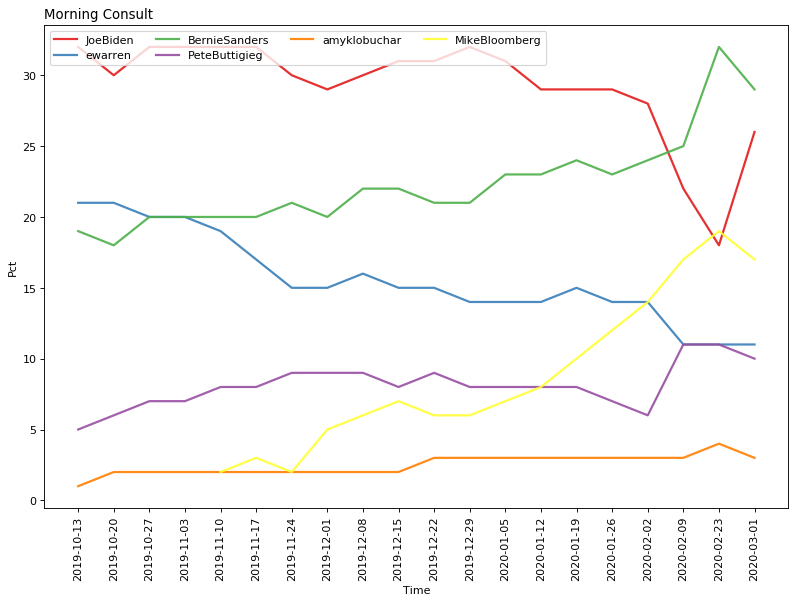

In [145]:
palette = plt.get_cmap('Set1')
poll = poll_nums[POLLSTER]
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
num = 0
for candidate in poll:
    x = [date_ids[p[1]] for p in poll[candidate]]
    y = [p[0] for p in poll[candidate]]
    plt.plot(
        x,
        y,
        marker='',
        color=palette(num),
        linewidth=2,
        alpha=0.9,
        label=candidate
    )
    num += 1

x_ticks_labels = [num_to_date[i] for i in np.arange(0, len(num_to_date), 1)]
plt.xticks(np.arange(0, len(num_to_date), 1), x_ticks_labels, rotation='vertical')
plt.legend(loc=2, ncol=4)

plt.title(POLLSTER, loc='left', fontsize=12, fontweight=0)
plt.xlabel('Time')
plt.ylabel('Pct')
plt.show()

For this graph, we wanted to visualize how much each candidate was spending over time. The purpose of our project is to compare candidate’s Twitter usage and ad spending against their own poll results. So, this graph is not meant to compare candidates to each other but just visualize the Polling dataset and see the changes in their poll results over time. There is no skew on each candidate’s distribution since there is a set time frame. There are also no outliers for each candidate’s poll results. For Biden, you can see over time, his poll results decrease and increase variably over time. Sanders’ poll results generally increase over time where as Warren’s poll results decrease over time. Buttigeig’s poll results also increase over time with small dips in poll results. Lastly, Klobuchar’s poll results remain stagnant over time with small increases.

## Visualizing Tweets Data
This is the trend in tweets count over the weeks between October 6th, 2019 to March 1st, 2020.

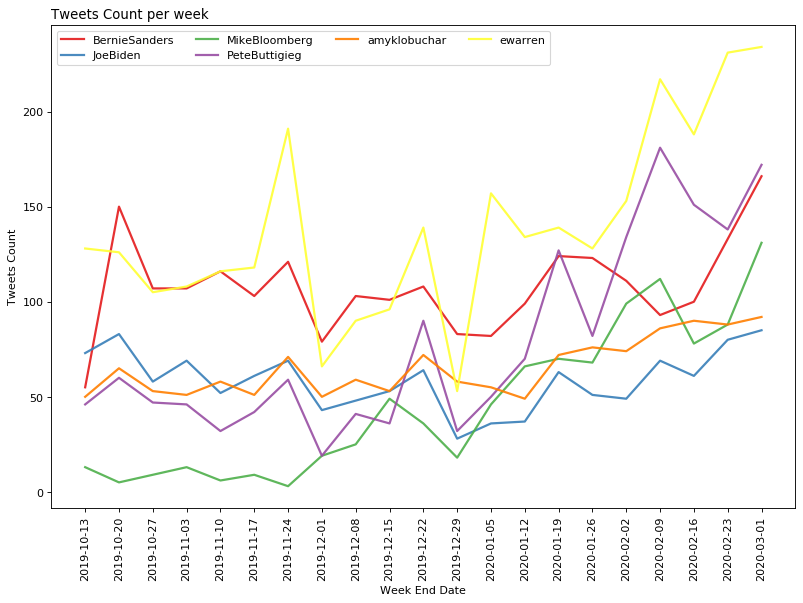

In [146]:
d = defaultdict(lambda: ([], []))
for r in df_tweets_count.iterrows():
    d[r[1]['handle']][0].append(r[1]['week_end_date'])
    d[r[1]['handle']][1].append(r[1]['counts'])

palette = plt.get_cmap('Set1')
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
num = 0
for candidate in d:
    x = d[candidate][0]
    y = d[candidate][1]
    plt.plot(
        x,
        y,
        marker='',
        color=palette(num),
        linewidth=2,
        alpha=0.9,
        label=candidate
    )
    num += 1

plt.xticks(rotation='vertical')
plt.legend(loc=2, ncol=4)

plt.title('Tweets Count per week', loc='left', fontsize=12, fontweight=0)
plt.xlabel('Week End Date')
plt.ylabel('Tweets Count')
plt.show()

From this graph we see all of the candidates Tweet count, or Twitter Activity, overtime. It appears there is really no trend when it comes to candidates’ Twitter activity over time and there really are no outliers. For the week of November 24 it appears all candidates Twitter activity peaks, suggesting there may have been an important milestone there. Overall, our hypothesis and research question are built on the foundation of this graph, meaning this graph only tells a part of what we are trying to do. There is no distribution when it comes to what we are actually analyzing, which comes later.

## Visualizing Ad Spending Data
To understand the gap in spendings between candidates, we can look at the following chart. We could see that Bloomberg spent the most money on ads by far.

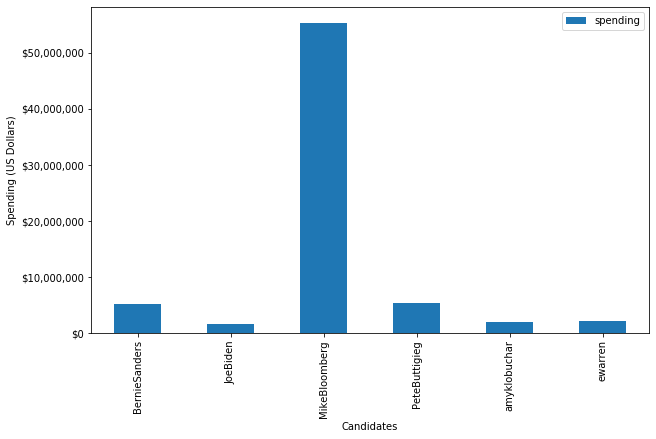

In [147]:
df_ads_sum = df_ads.groupby(by='name').sum()
# Total ads spendings for each candidate from 2019-10-06 to 2020-03-01
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_ads_sum.plot(kind='bar', y='spending',
                align='center', width=.5, edgecolor='none', 
                ax=ax)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Candidates')
ax.set_ylabel('Spending (US Dollars)')
plt.show()

This is the trend in ads spending over the weeks between 2019-10-06 to 2020-03-01.

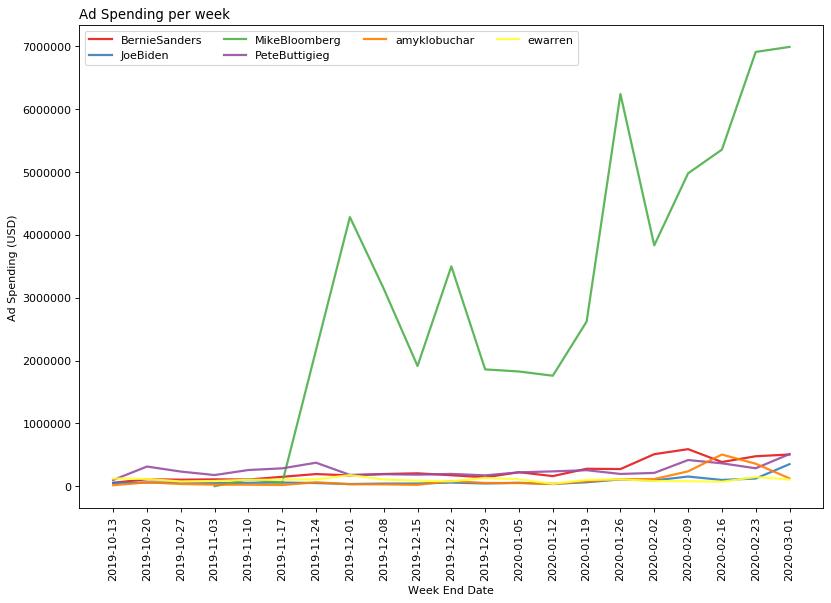

In [148]:
date_ids = dict()
num_to_date = dict()
num = 0
for dt in week_end_dates:
    date_ids[dt] = num
    num_to_date[num] = dt
    num += 1
    
d = defaultdict(lambda: ([], []))
for r in df_ads.iterrows():
    d[r[1]['name']][0].append(r[1]['week_end_date'])
    d[r[1]['name']][1].append(r[1]['spending'])

palette = plt.get_cmap('Set1')
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
num = 0
for candidate in d:
    x = [date_ids[date] for date in d[candidate][0]]
    y = d[candidate][1]
    plt.plot(
        x,
        y,
        marker='',
        color=palette(num),
        linewidth=2,
        alpha=0.9,
        label=candidate
    )
    num += 1

xr = np.arange(0, len(num_to_date), 1)
x_ticks_labels = [num_to_date[i] for i in xr]
plt.xticks(xr, x_ticks_labels, rotation='vertical')
plt.legend(loc=2, ncol=4)

plt.title('Ad Spending per week', loc='left', fontsize=12, fontweight=0)
plt.xlabel('Week End Date')
plt.ylabel('Ad Spending (USD)')
plt.show()

In this graph, we see the trend of how much money each candidate spent on advertisement throughout time. Although Bloomberg’s spending on advertisements seems like an outlier compared to other candidates, within the context of our project, it does not make sense to note this since our focus is not to compare spending between candidates. We see that there are some spikes in spending, most obviously noted from Bloomberg, and that the amount spent on advertisement generally increases throughout time.
Other than the general increase in spending, there is no strong relationships between the variables due to the nature of our dataset.

# Data Analysis

## Graphs
For each candidate, we wanted to visualize their ad spending vs their poll results as well as their number of Tweets vs their poll results. We graphed this relationship for each candidate. The x-axis was the time frame broken up within weeks. We had two y-axises for individual variables that we wanted to track - the red y-axis kept track of ad spending and the blue y-axis kept track of poll results. 
## Pearson correlation
We chose to approach our analysis by calculating the Pearson correlation because we wanted to analyze whether there was a linear relationship between ad spending and poll results as well as between Twitter usage and poll results.
## OLS 
We chose to approach our analysis by also using the Ordinary Least Squares method to see if there is a relationship between ad spending and poll results and between Twitter usage and poll results.

## Ad Spending vs. Poll Numbers

### Trends Over Time
To observe the trend between ads spendings vs. poll numbers, we plot a graph for each candidate where the x-axis is the end date of the week, left y-axis is the ads spending for that week, and the right y-axis is the poll number for that week.

In [149]:
def plot_ads_vs_candidate(candidate, pollster):
    global df_polls, df_ads
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_a = df_ads[df_ads['name'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_a.set_index('week_end_date')).dropna(subset=['name'])
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_title('Candidate: %s, Poll: %s' % (candidate, pollster))
    ax1.set_xlabel('Week Ending Date')
    ax1.set_ylabel('Ads Spending (USD)', color='tab:red')
    ax1.plot(df.index, df['spending'], color='tab:red')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Polls Pct', color='tab:blue')
    ax2.plot(df.index, df['pct'], color='tab:blue')
    
    fig.tight_layout()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    plt.show()


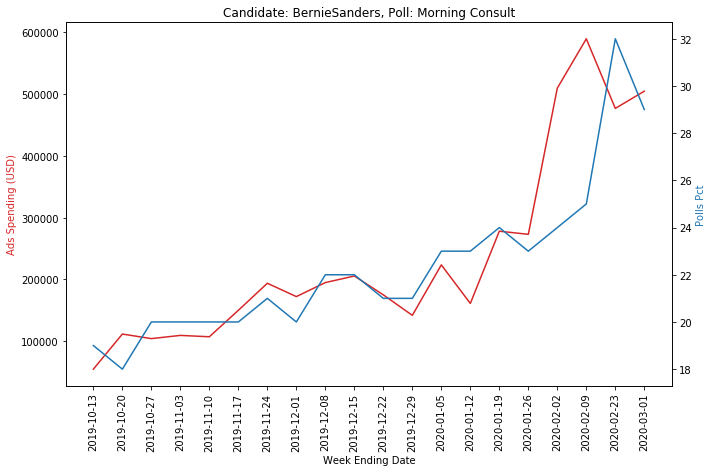

In [150]:
plot_ads_vs_candidate('BernieSanders', POLLSTER)

We see from this graph that ad spending does tend to trend very closely with poll numbers for Sanders. An interesting thing to note is as we reach February it is almost as if there is a delay between the ad spending and the corresponding results.

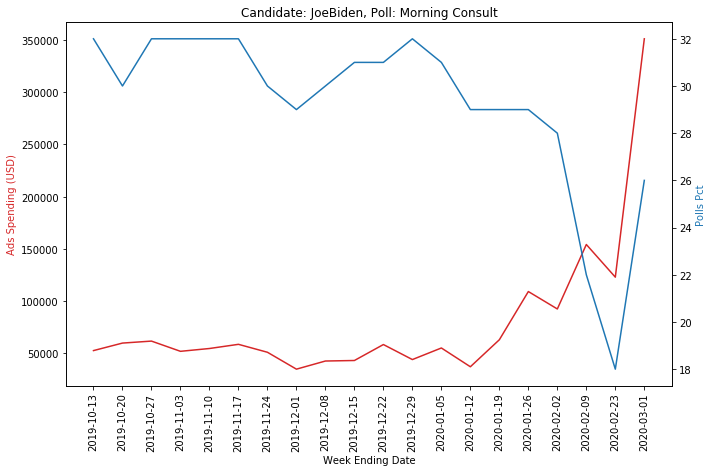

In [151]:
plot_ads_vs_candidate('JoeBiden', POLLSTER)

In the beginning, as you’ll see with most of these graphs for ad spending, there seems to be random correlation and it is hard to tell if there is correlation or not. However as you get to more recent dates, specifically February, the graph tells a better story. In Biden’s case interestingly enough there seems to be a weak direct correlation between ad spending and poll numbers, but right as March numbers come in ad spending drastically indirectly correlates with poll numbers for Biden.

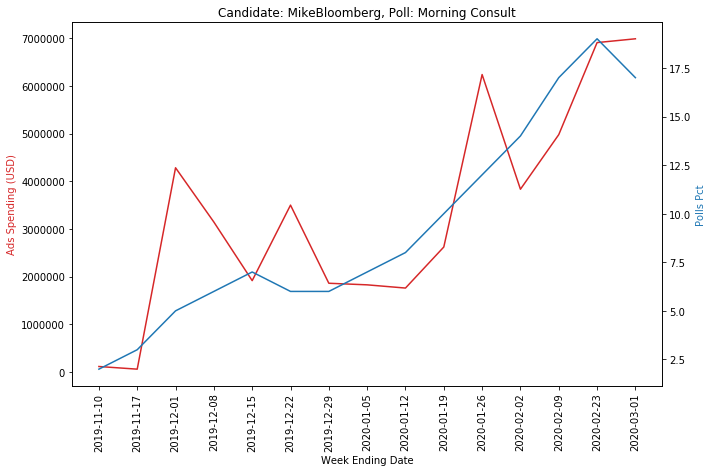

In [152]:
plot_ads_vs_candidate('MikeBloomberg', POLLSTER)

Bloomberg has a unique graph in that it seems no matter what he does his poll numbers go up. His ad spending is a little more unique as there are very clear peaks in ad spending for him that also do not seem to affect his numbers. The week of February 9th his ad spending plummets and you see the effects of that on his poll numbers going into May. Maybe this is around the time he heavily started considering dropping out?

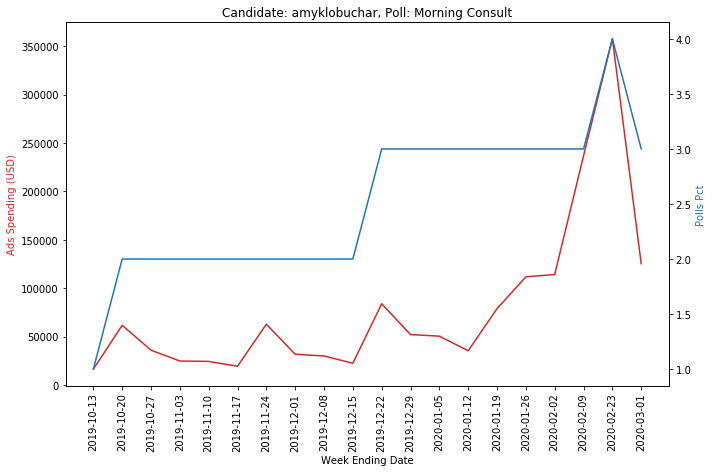

In [153]:
plot_ads_vs_candidate('amyklobuchar', POLLSTER)

Her graph tells a very similar story to Bloomberg’s and even a little like Biden’s in that towards the beginning of these graphs there seems to be no correlation between ad spending and poll numbers. Even more similarly to Bloomberg’s graph, her popularity seems to rise no matter what happens with her ad spending until February hits and she ultimately tanks in popularity and ad spending.

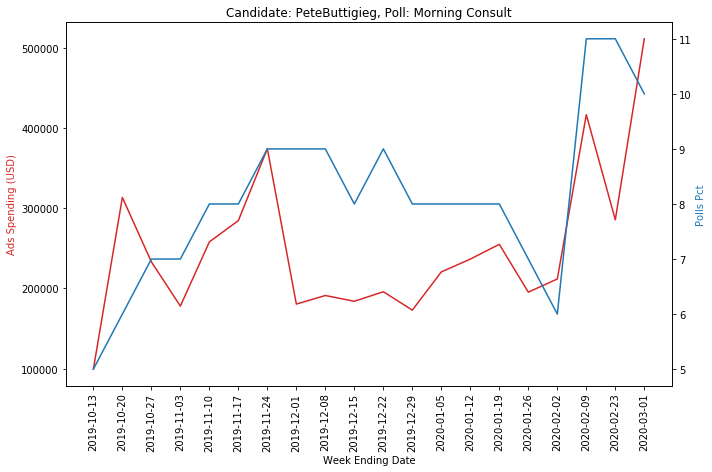

In [154]:
plot_ads_vs_candidate('PeteButtigieg', POLLSTER)

Similar to Bloomberg and Klobuchar

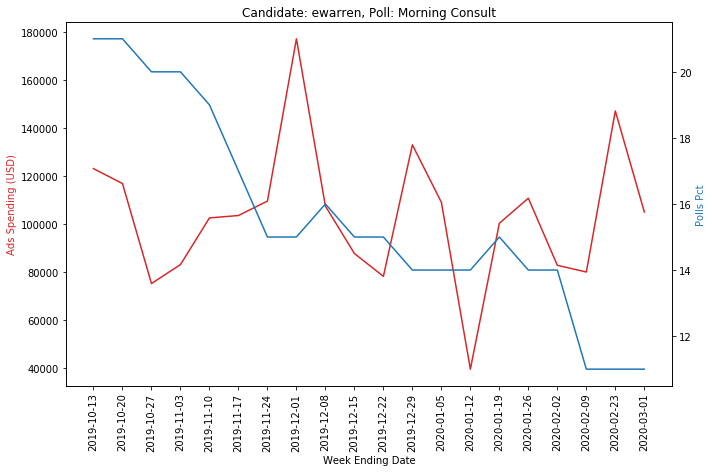

In [155]:
plot_ads_vs_candidate('ewarren', POLLSTER)

Similar to the above three and even more so with Bloomberg with the spikes in ad spending. Hers is unique from the rest in that her popularity is trending down the entire time.

### OLS Models
We will also generate OLS model to observe the significance of the correlation between ads spendings vs. poll numbers.

Null Hypothesis: There is no relationship between poll results and tweets count.\
We're going to be using alpha = 0.01.

In [156]:
def gen_ols_model_ads(candidate, pollster):
    global df_polls, df_ads
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_a = df_ads[df_ads['name'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_a.set_index('week_end_date')).dropna(subset=['name'])
    outcome, predictors = patsy.dmatrices('pct ~ spending', df)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    return res

In [157]:
gen_ols_model_ads('BernieSanders', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     38.11
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           7.92e-06
Time:                        18:33:36   Log-Likelihood:                -40.738
No. Observations:                  20   AIC:                             85.48
Df Residuals:                      18   BIC:                             87.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1678      0.806     22.532      0.000      16.474      19.862
spending    1.767e-05   2.86e-06      6.173      0.000    1.17e-05    2.37e-05
==============================================================================
Omnibus:                        6.631   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.632
Skew:                           0.657   Prob(JB):                       0.0986
Kurtosis:                       4.958   Cond. No.                     5.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Bernie Sanders, we got a p-value of 0. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Sanders' ad spending and poll results.

In [158]:
gen_ols_model_ads('JoeBiden', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     6.757
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0181
Time:                        18:33:36   Log-Likelihood:                -50.358
No. Observations:                  20   AIC:                             104.7
Df Residuals:                      18   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3704      1.080     29.055      0.000      29.102      33.639
spending   -2.659e-05   1.02e-05     -2.599      0.018   -4.81e-05    -5.1e-06
==============================================================================
Omnibus:                       21.431   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.197
Skew:                          -1.972   Prob(JB):                     1.24e-06
Kurtosis:                       7.133   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Joe Biden, we got a p-value of 0.018. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Biden's ad spending and poll results.

In [159]:
gen_ols_model_ads('MikeBloomberg', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     30.49
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           9.85e-05
Time:                        18:33:36   Log-Likelihood:                -36.833
No. Observations:                  15   AIC:                             77.67
Df Residuals:                      13   BIC:                             79.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5582      1.445      1.771      0.100      -0.563       5.680
spending    2.012e-06   3.64e-07      5.522      0.000    1.22e-06     2.8e-06
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.705
Skew:                          -0.486   Prob(JB):                        0.703
Kurtosis:                       2.572   Cond. No.                     7.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Mike Bloomberg, we got a p-value of 0. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Bloomberg's ad spending and poll results.

In [160]:
gen_ols_model_ads('amyklobuchar', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     20.29
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           0.000274
Time:                        18:33:36   Log-Likelihood:                -12.846
No. Observations:                  20   AIC:                             29.69
Df Residuals:                      18   BIC:                             31.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0306      0.150     13.503      0.000       1.715       2.346
spending    5.963e-06   1.32e-06      4.504      0.000    3.18e-06    8.74e-06
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   0.467
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.150
Skew:                          -0.202   Prob(JB):                        0.928
Kurtosis:                       2.870   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Amy Klobuchar, we got a p-value of 0. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Klobuchar's ad spending and poll results.

In [161]:
gen_ols_model_ads('PeteButtigieg', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     8.837
Date:                Wed, 18 Mar 2020   Prob (F-statistic):            0.00815
Time:                        18:33:36   Log-Likelihood:                -32.670
No. Observations:                  20   AIC:                             69.34
Df Residuals:                      18   BIC:                             71.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7674      0.837      6.888      0.000       4.008       7.526
spending    9.334e-06   3.14e-06      2.973      0.008    2.74e-06    1.59e-05
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.042
Skew:                          -0.049   Prob(JB):                        0.979
Kurtosis:                       2.799   Cond. No.                     7.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Pete Buttigieg, we got a p-value of 0.008. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Buttigieg's ad spending and poll results.

In [162]:
gen_ols_model_ads('ewarren', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                   0.04940
Date:                Wed, 18 Mar 2020   Prob (F-statistic):              0.827
Time:                        18:33:36   Log-Likelihood:                -50.801
No. Observations:                  20   AIC:                             105.6
Df Residuals:                      18   BIC:                             107.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1879      2.742      5.903      0.000      10.427      21.949
spending   -5.677e-06   2.55e-05     -0.222      0.827   -5.93e-05     4.8e-05
==============================================================================
Omnibus:                        1.041   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.963
Skew:                           0.378   Prob(JB):                        0.618
Kurtosis:                       2.236   Cond. No.                     4.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Elizabeth Warren, we got a p-value of 0.827. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Warren's ad spending and poll results.

### Pearson Correlation
We will also compute the Pearson correlation matrix and observe the correlation factor between spending vs. poll number.

In [163]:
def gen_ads_corr_matrix(candidate, pollster):
    global df_polls, df_ads
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_a = df_ads[df_ads['name'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_a.set_index('week_end_date')).dropna(subset=['name'])
    return df.corr()

In [164]:
gen_ads_corr_matrix('BernieSanders', POLLSTER)

,pct,spending
pct,1.000000,0.824133
spending,0.824133,1.000000


There is a Pearson correlation of 0.824133. For Sanders, we can see there is a strong correlation between ad spending and poll results.

In [165]:
gen_ads_corr_matrix('JoeBiden', POLLSTER)

,pct,spending
pct,1.000000,-0.522438
spending,-0.522438,1.000000


There is a Pearson correlation of -0.335798 where we will take the absolute value. For Biden, we can there is a weak correlation between ad spending and poll results.

In [166]:
gen_ads_corr_matrix('MikeBloomberg', POLLSTER)

,pct,spending
pct,1.0000,0.8373
spending,0.8373,1.0000


There is a Pearson correlation of 0.297902. For Bloomberg, we can there is a weak correlation between ad spending and poll results. This is interesting because Bloomberg spent a tremendous amount of advertising.

In [167]:
gen_ads_corr_matrix('amyklobuchar', POLLSTER)

,pct,spending
pct,1.000000,0.727936
spending,0.727936,1.000000


There is a Pearson correlation of 0.727936. For Klobuchar, we can there is a strong correlation between ad spending and poll results.

In [168]:
gen_ads_corr_matrix('PeteButtigieg', POLLSTER)

,pct,spending
pct,1.000000,0.573837
spending,0.573837,1.000000


There is a Pearson correlation of 0.573837. For Buttigeig, we can there is a moderate correlation between ad spending and poll results.

In [169]:
gen_ads_corr_matrix('ewarren', POLLSTER)

,pct,spending
pct,1.000000,-0.052315
spending,-0.052315,1.000000


There is a Pearson correlation of -0.052315. For Warren, we can there is a very weak correlation between ad spending and poll results.

## Tweets Count vs. Candidate

### Trends Over Time
To observe the trend between tweets count vs. poll numbers, we plot a graph for each candidate where the x-axis is the end date of the week, left y-axis is the tweets count for that week, and the right y-axis is the poll number for that week.

In [170]:
def plot_tweets_vs_candidate(candidate, pollster):
    global df_polls, df_tweets_count
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_t = df_tweets_count[df_tweets_count['handle'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_t.set_index('week_end_date'))
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_title('Candidate: %s, Poll: %s' % (candidate, pollster))
    ax1.set_xlabel('Week Ending Date')
    ax1.set_ylabel('Number of Tweets', color='tab:red')
    ax1.plot(df.index, df['counts'], color='tab:red')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Polls Pct', color='tab:blue')
    ax2.plot(df.index, df['pct'], color='tab:blue')
    
    fig.tight_layout()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    plt.show()


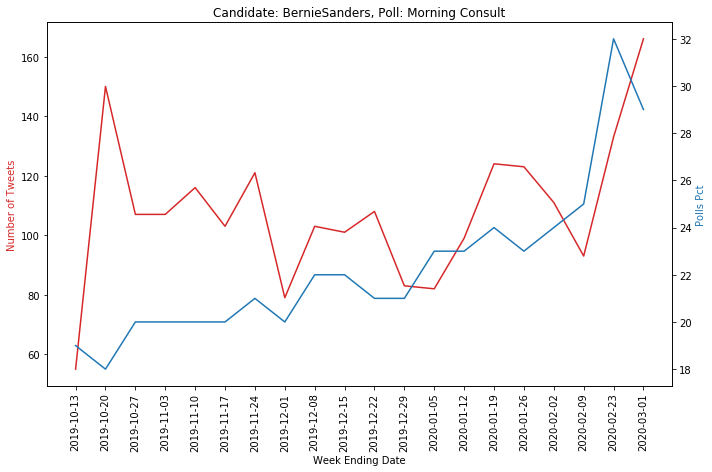

In [171]:
plot_tweets_vs_candidate('BernieSanders', POLLSTER)

Seems to generally have a direct correlation

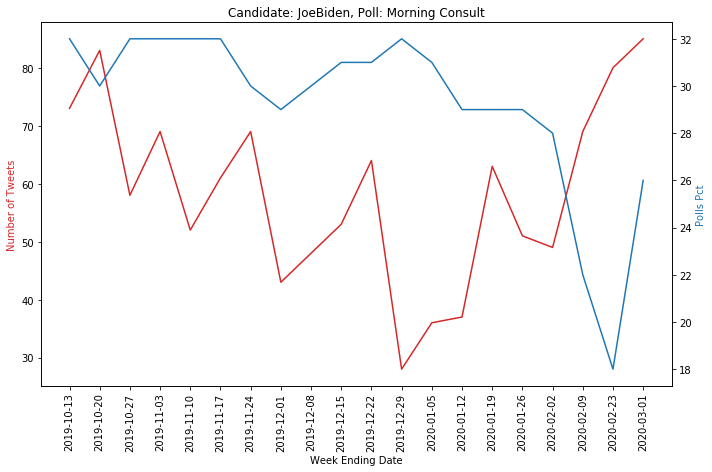

In [172]:
plot_tweets_vs_candidate('JoeBiden', POLLSTER)

Just like Bloomberg’s ad spending correlation graph, Biden’s Twitter activity similarly does not seem to have any correlation with his poll numbers. The peaks in tweets are interesting and may indicate key milestones in his election.

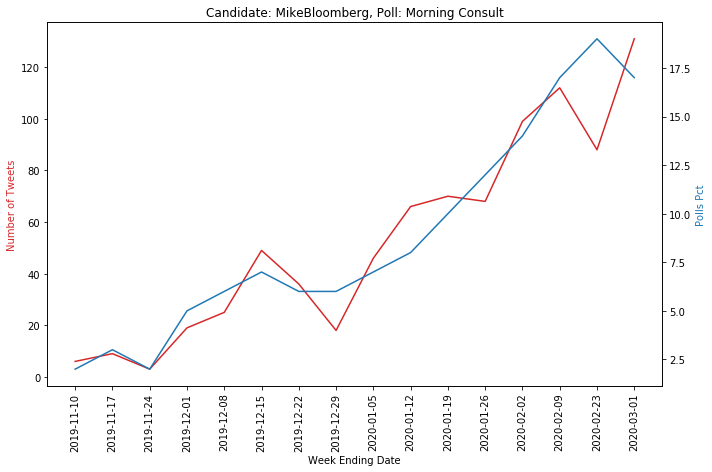

In [173]:
plot_tweets_vs_candidate('MikeBloomberg', POLLSTER)

Similar to Sanders

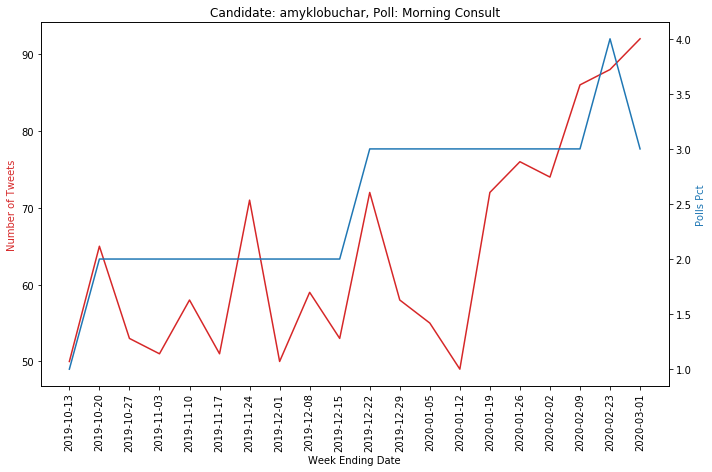

In [174]:
plot_tweets_vs_candidate('amyklobuchar', POLLSTER)

Similar to Biden’s however her popularity trends upwards and comes in bursts. Her peaks in Twitter activity appear more moderate than Biden’s but it seems to work until Late February where it becomes a negative correlation.

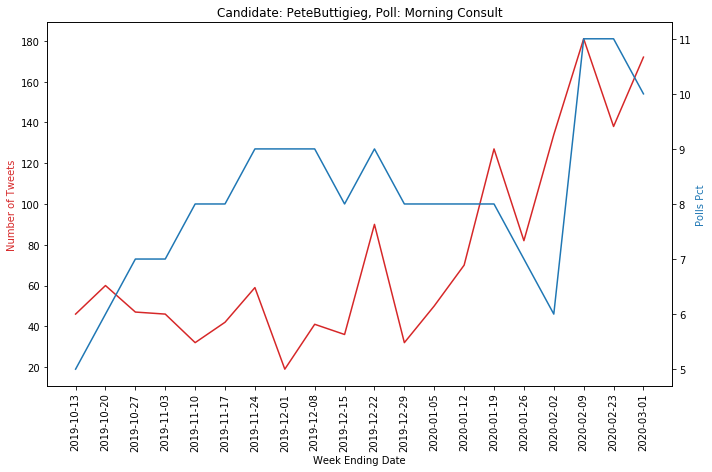

In [175]:
plot_tweets_vs_candidate('PeteButtigieg', POLLSTER)

The beginning seems to have no correlation.

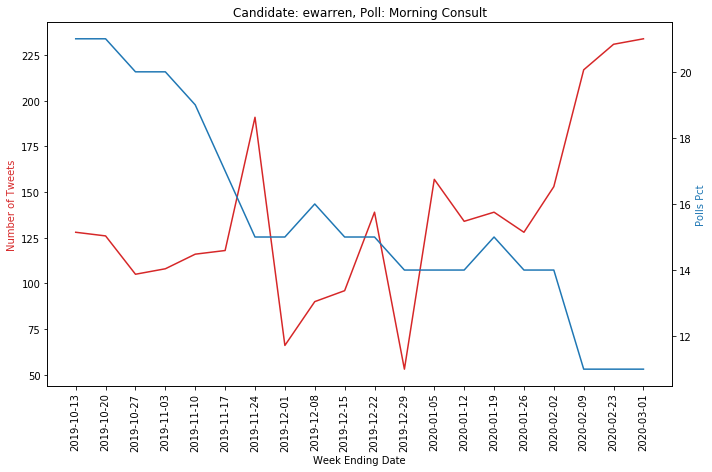

In [176]:
plot_tweets_vs_candidate('ewarren', POLLSTER)

This one is very interesting as overall the correlation is negative, but looking at specific weeks especially late November to Mid January there seems to be no correlation.

### OLS Models
We will also generate OLS model to observe the significance of the correlation between tweets count vs. poll numbers.

Null Hypothesis: There is no relationship between poll results and tweets count.\
We're going to be using alpha = 0.01.

In [177]:
def gen_ols_model_tweets(candidate, pollster):
    global df_polls, df_tweets_count
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_t = df_tweets_count[df_tweets_count['handle'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_t.set_index('week_end_date'))
    outcome, predictors = patsy.dmatrices('pct ~ counts', df)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    return res

In [178]:
gen_ols_model_tweets('BernieSanders', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.104
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0579
Time:                        18:33:38   Log-Likelihood:                -50.053
No. Observations:                  20   AIC:                             104.1
Df Residuals:                      18   BIC:                             106.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0719      3.176      5.060      0.000       9.399      22.745
counts         0.0580      0.029      2.026      0.058      -0.002       0.118
==============================================================================
Omnibus:                        5.261   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.220
Skew:                           0.526   Prob(JB):                        0.200
Kurtosis:                       4.660   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Bernie Sanders, we got a p-value of 0.058. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Sanders' tweets count and poll results

In [179]:
gen_ols_model_tweets('JoeBiden', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     3.302
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0859
Time:                        18:33:38   Log-Likelihood:                -51.861
No. Observations:                  20   AIC:                             107.7
Df Residuals:                      18   BIC:                             109.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4706      2.972     11.597      0.000      28.226      40.715
counts        -0.0892      0.049     -1.817      0.086      -0.192       0.014
==============================================================================
Omnibus:                       10.225   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.575
Skew:                          -1.295   Prob(JB):                       0.0227
Kurtosis:                       4.544   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Joe Biden, we got a p-value of 0.086. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Biden's tweets count and poll results

In [180]:
gen_ols_model_tweets('MikeBloomberg', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     104.9
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           6.96e-08
Time:                        18:33:38   Log-Likelihood:                -32.257
No. Observations:                  16   AIC:                             68.51
Df Residuals:                      14   BIC:                             70.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9966      0.824      2.423      0.030       0.230       3.764
counts         0.1291      0.013     10.240      0.000       0.102       0.156
==============================================================================
Omnibus:                       16.067   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.284
Skew:                           1.658   Prob(JB):                     0.000791
Kurtosis:                       6.229   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Mike Bloomberg, we got a p-value of 0. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Bloomberg's tweets count and poll results

In [181]:
gen_ols_model_tweets('amyklobuchar', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     13.50
Date:                Wed, 18 Mar 2020   Prob (F-statistic):            0.00174
Time:                        18:33:38   Log-Likelihood:                -14.797
No. Observations:                  20   AIC:                             33.59
Df Residuals:                      18   BIC:                             35.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4119      0.581      0.709      0.487      -0.808       1.632
counts         0.0326      0.009      3.674      0.002       0.014       0.051
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.218
Skew:                           0.173   Prob(JB):                        0.897
Kurtosis:                       2.623   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Amy Klobuchar, we got a p-value of 0.002. This is less than 0.01, so we reject the null hypothesis, meaning that there is a relationship between Klobuchar's tweets count and poll results

In [182]:
gen_ols_model_tweets('PeteButtigieg', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4.762
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0426
Time:                        18:33:38   Log-Likelihood:                -34.317
No. Observations:                  20   AIC:                             72.63
Df Residuals:                      18   BIC:                             74.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0060      0.593     11.809      0.000       5.760       8.252
counts         0.0145      0.007      2.182      0.043       0.001       0.029
==============================================================================
Omnibus:                        2.296   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.704
Skew:                          -0.698   Prob(JB):                        0.427
Kurtosis:                       2.694   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Pete Buttigieg, we got a p-value of 0.043. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Buttigieg's tweets count and poll results

In [183]:
gen_ols_model_tweets('ewarren', POLLSTER).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pct   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     7.409
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0140
Time:                        18:33:38   Log-Likelihood:                -47.381
No. Observations:                  20   AIC:                             98.76
Df Residuals:                      18   BIC:                             100.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2618      1.818     11.146      0.000      16.443      24.081
counts        -0.0342      0.013     -2.722      0.014      -0.061      -0.008
==============================================================================
Omnibus:                        1.808   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.514
Skew:                           0.612   Prob(JB):                        0.469
Kurtosis:                       2.435   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Elizabeth Warren, we got a p-value of 0.014. This is greater than 0.01, so we fail to reject the null hypothesis, meaning that there is no relationship between Warren's tweets count and poll results

### Pearson Correlation
We will also compute the Pearson correlation matrix and observe the correlation factor between tweets count vs. poll number.

In [184]:
def gen_tweets_corr_matrix(candidate, pollster):
    global df_polls, df_tweets_count
    df_p = df_polls[(df_polls['candidate_name'] == candidate) & (df_polls['pollster'] == pollster)]
    df_t = df_tweets_count[df_tweets_count['handle'] == candidate].sort_values(by='week_end_date')
    df = df_p.set_index('end_date').join(df_t.set_index('week_end_date'))
    return df.corr()

In [185]:
gen_tweets_corr_matrix('BernieSanders', POLLSTER)

,pct,counts
pct,1.000000,0.430912
counts,0.430912,1.000000


There is a Pearson correlation of 0.430912. For Sanders, we can see there is a weak correlation between ad spending and poll results.

In [186]:
gen_tweets_corr_matrix('JoeBiden', POLLSTER)

,pct,counts
pct,1.000000,-0.393733
counts,-0.393733,1.000000


There is a Pearson correlation of -0.393733 where we will take the absolute value. For Biden, we can there is a very weak correlation between ad spending and poll results.

In [187]:
gen_tweets_corr_matrix('MikeBloomberg', POLLSTER)

,pct,counts
pct,1.000000,0.939263
counts,0.939263,1.000000


There is a Pearson correlation of 0.939263. For Bloomberg, we can there is a very strong correlation between ad spending and poll results. This is interesting because Bloomberg spent a tremendous amount of advertising.

In [188]:
gen_tweets_corr_matrix('amyklobuchar', POLLSTER)

,pct,counts
pct,1.000000,0.654657
counts,0.654657,1.000000


There is a Pearson correlation of 0.654657. For Klobuchar, we can there is a moderate correlation between ad spending and poll results.

In [189]:
gen_tweets_corr_matrix('ewarren', POLLSTER)

,pct,counts
pct,1.000000,-0.539999
counts,-0.539999,1.000000


There is a Pearson correlation of -0.539999. For Warren, we can there is a moderate correlation between ad spending and poll results.

In [190]:
gen_tweets_corr_matrix('PeteButtigieg', POLLSTER)

,pct,counts
pct,1.000000,0.457391
counts,0.457391,1.000000


There is a Pearson correlation of 0.457391. For Buttigeig, we can there is a weak correlation between ad spending and poll results.

# Ethics and Privacy
The research question we asked is meant in no way to cause inflammatory response. We are only focused on seeing the data and presenting it in a way that will answer are question. We do not plan to sway anyone with any political agenda using this data. We do not intend to attack or target certain demographics with this knowledge. We will not release any identifying data of any of the users from Twitter that we found and we will only explain correlations we found. We got all of our data from open-sourced sources. Fivethirtyeight and Twitter have publicly published the data. However, we understand there can be some violations of personal privacy especially with the Twitter data we use. As such any names or any other identifying data other than the candidates names are removed. In terms of ad spending we made sure no names were attached to the money and only the hard numbers of total spending, that are publicly reported, were used.
We acknowledge that there may be bias in the data. We made sure to look at the numbers at face value and to not let our own political stances affect our interpretations or results. In no way did we change any of the data to fit a political agenda and we mean to do no harm to anyone or any of the candidates with this information. We did not mention any of our political views and any biases are limited by only analyzing off of the numbers. Our analysis is not meant to dictate others actions. We are simply visualizing the results from the datasets that we obtained. In no way are we affiliated with any candidates or websites that we got the data from and we leave this project open-ended for anyone to view this project and determine on their own what they want to do with this information.


# Conclusion and Discussion
From our analysis above, we conclude that there is no direct correlation between ad spending and poll results nor between a candidates’ twitter activity and their poll results.

For some candidates, the correlation exists; however, this is not uniform nor consistent across all candidates. Therefore, we cannot confirm that there is a positive correlation. The datasets we used in our analysis were quite large and we attempted multiple approaches to conclude whether the correlation existed. However, because so many factors contribute to each candidate’s popularity, stating that a correlation exists with ad spending or twitter activity is quite difficult.

Although we still believe that media is quite powerful and that twitter activity and ad spending DOES have some impact on a candidate’s popularity, because there are too many factors that influence poll results, finding out exactly how significant our factors are was difficult. If we were to expand on this project, it would have been interesting to analyze more factors and focus on which factors are MORE significant than others. This would be a bit more complex, yet nuanced and reasonable than our current hypothesis, which attempts to conclude whether our two factors have a direct correlation with poll results. With sentiment analysis, we could also have analyzed the content of the candidates’ tweets, which would have led to a more specific positive or negative correlation.

Although we could not make a definitive conclusion about our hypothesis, it was interesting to see how some candidates had extremely high positive correlation with ad spending and/or twitter activity. It would be interesting to see the actual election results and note if general twitter activity or ad spending could have helped us predict the results.